# This notebook reproduces the result on heat source recontruction (also Figure-1) of the main paper. 

In [4]:
import torch
import numpy as np                                          
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pylab as plt
import pickle
import scipy.io as sio
import heat 
import heatn 
import heatn1
import pywt
import scipy
from scipy.fft import ifft, fft, fftfreq, fftshift
from scipy import signal
%reload_ext autoreload
%autoreload 2

### The source and the measurements are generated. Then the **searchalgo** function implements Algorithm-1. 

In [7]:
meas1, measn, u1, A,Fw= heat.gensingledata(n=500,alpha=20,m=15,Ncount=1000,sigma=1)
Nhat = heat.searchalgo(meas,A,lf=100,iter=100)

C:\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:1055: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


100 34 tensor(0.9934)
100 44 tensor(0.9945)
100 164 tensor(1.0068)
164 195 tensor(1.0036)
195 185 tensor(0.9989)
195 228 tensor(1.0039)
228 306 tensor(1.0100)
306 381 tensor(1.0107)
381 308 tensor(0.9897)
381 430 tensor(1.0076)
430 427 tensor(0.9995)
430 377 tensor(0.9918)
430 419 tensor(0.9982)
430 555 tensor(1.0225)
555 474 tensor(0.9851)
555 500 tensor(0.9896)
555 470 tensor(0.9845)
555 596 tensor(1.0096)
596 603 tensor(1.0018)
603 621 tensor(1.0049)
621 502 tensor(0.9741)
621 589 tensor(0.9913)
621 744 tensor(1.0329)
744 681 tensor(0.9838)
744 760 tensor(1.0041)
760 756 tensor(0.9992)
760 747 tensor(0.9966)
760 820 tensor(1.0196)
820 888 tensor(1.0352)
888 934 tensor(1.0001)
934 928 tensor(1.0027)
928 996 tensor(0.7374)
928 904 tensor(0.9994)
904 924 tensor(1.0017)
924 932 tensor(0.9972)
924 852 tensor(0.9800)
924 879 tensor(0.9924)
924 871 tensor(0.9894)
924 879 tensor(0.9924)
924 880 tensor(0.9928)
924 877 tensor(0.9921)
924 869 tensor(0.9891)
924 905 tensor(0.9988)
924 1000 tens

### Using the estimated diffusion time, the final recontruction is performed as shown in the first figure. Also, to verify the mixed norm theorem, we plot the mixed norm objective for various of diffusion time in the second figure.  

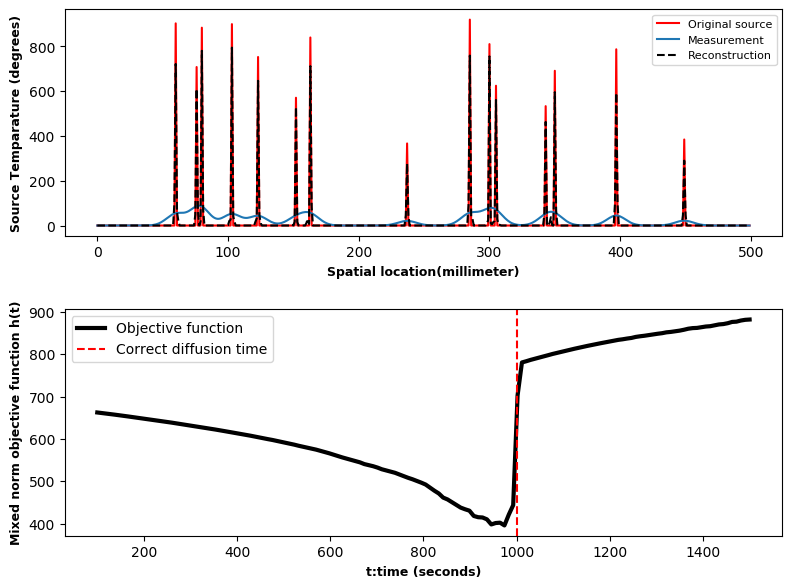

In [170]:
fig, ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(u,color='red',label='Original source')
ax[0].plot(meas,label='Measurement')
ax[0].plot(xrec,linestyle='--',color='black',label='Reconstruction')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Spatial location(millimeter)', fontweight='bold',fontsize=9)
ax[0].set_ylabel('Source Temparature (degrees)', fontweight='bold',fontsize=9)

[f1,n1]=heat.plotnormvsN(meas,A)
ax[1].plot(n1.detach().numpy(),f1.detach().numpy(),linewidth=3,color='black',label='Objective function')
ax[1].set_xlabel('t:time (seconds)', fontweight='bold',fontsize=9)
ax[1].set_ylabel('Mixed norm objective function h(t)', fontweight='bold',fontsize=9)
ax[1].axvline(x=1000,linestyle='--', color="red",label='Correct diffusion time')
ax[1].legend()
plt.tight_layout(pad=1.0)
plt.savefig('results/heat_source_rec.svg', format='svg', dpi=1200)
plt.show()